# This code will read in a SNPP aerosol netcdf file using xarray. It will plot a global map, a map centered on California and then a multipanel plot.

### Example by Bonne Ford 
#### June 2022

In [3]:
# Import necessary modules
import xarray  
import matplotlib.pyplot as plt
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib as mplt
import pylab as pl

#.A2019293 -> is October 20th
#.A2019300 -> is October 27th
#.A2019329 -> is November 22nd

ModuleNotFoundError: No module named 'xarray'

In [4]:
# Read in the file using xarray
snppdataoct20=xarray.open_dataset('C:/Users/larterburn/Python Notebooks/Ploting_AOD/AERDB_D3_VIIRS_SNPP.A2019293.011.2021099143137.nc')   # The 'M3' means monthly level 3 data.
snppdataoct27=xarray.open_dataset('C:/Users/larterburn/Python Notebooks/Ploting_AOD/AERDB_D3_VIIRS_SNPP.A2019300.011.2021099143140.nc')   # The 'M3' means monthly level 3 data.
snppdatanov22=xarray.open_dataset('C:/Users/larterburn/Python Notebooks/Ploting_AOD/AERDB_D3_VIIRS_SNPP.A2019329.011.2021099143139.nc')   # The 'M3' means monthly level 3 data.

NameError: name 'xarray' is not defined

In [3]:
# List all the datasets and attributes
snppdataoct20
snppdataoct27
snppdatanov22

<xarray.Dataset>
Dimensions:                                                      (Latitude_1D: 180, Longitude_1D: 360, Aerosol_Types: 8, Land_Bands: 3, Ocean_Bands: 7)
Coordinates:
  * Aerosol_Types                                                (Aerosol_Types) int32 ...
  * Land_Bands                                                   (Land_Bands) float32 ...
    Latitude                                                     (Latitude_1D, Longitude_1D) float32 ...
  * Latitude_1D                                                  (Latitude_1D) float32 ...
    Longitude                                                    (Latitude_1D, Longitude_1D) float32 ...
  * Longitude_1D                                                 (Longitude_1D) float32 ...
  * Ocean_Bands                                                  (Ocean_Bands) float32 ...
Data variables: (12/37)
    Aerosol_Optical_Thickness_550_Land_Count                     (Latitude_1D, Longitude_1D) float64 ...
    Aerosol_Optical_Thickness_550_Land_Maximum                   (Latitude_1D, Longitude_1D) float32 ...
    Aerosol_Optical_Thickness_550_Land_Mean                      (Latitude_1D, Longitude_1D) float32 ...
    Aerosol_Optical_Thickness_550_Land_Minimum                   (Latitude_1D, Longitude_1D) float32 ...
    Aerosol_Optical_Thickness_550_Land_Ocean_Count               (Latitude_1D, Longitude_1D) float64 ...
    Aerosol_Optical_Thickness_550_Land_Ocean_Maximum             (Latitude_1D, Longitude_1D) float32 ...
    ...                                                           ...
    Spectral_Aerosol_Optical_Thickness_Land_Count                (Land_Bands, Latitude_1D, Longitude_1D) float64 ...
    Spectral_Aerosol_Optical_Thickness_Land_Mean                 (Land_Bands, Latitude_1D, Longitude_1D) float32 ...
    Spectral_Aerosol_Optical_Thickness_Land_Standard_Deviation   (Land_Bands, Latitude_1D, Longitude_1D) float32 ...
    Spectral_Aerosol_Optical_Thickness_Ocean_Count               (Ocean_Bands, Latitude_1D, Longitude_1D) float64 ...
    Spectral_Aerosol_Optical_Thickness_Ocean_Mean                (Ocean_Bands, Latitude_1D, Longitude_1D) float32 ...
    Spectral_Aerosol_Optical_Thickness_Ocean_Standard_Deviation  (Ocean_Bands, Latitude_1D, Longitude_1D) float32 ...
Attributes: (12/58)
    description:                       VIIRS Deep Blue Level 3 daily aerosol ...
    comment:                           Data are the arithmetic mean of all VI...
    references:                        https://deepblue.gsfc.nasa.gov
    institution:                       NASA Goddard Space Flight Center
    production_datetime:               2021-04-09T14:31:39Z
    geospatial_lat_max:                90.0
    ...                                ...
    creator_institution:               Space Science & Engineering Center, Un...
    publisher_name:                    LAADS
    publisher_url:                     https://ladsweb.modaps.eosdis.nasa.gov/
    publisher_email:                   modis-ops@lists.nasa.gov
    publisher_institution:             NASA Level-1 and Atmosphere Archive & ...
    xmlmetadata:                       <?xml version="1.0"?>\n<!DOCTYPE Granu...

## Now plot the AOD

Text(0.5, 1.0, 'AOD 550nm October 20 ')

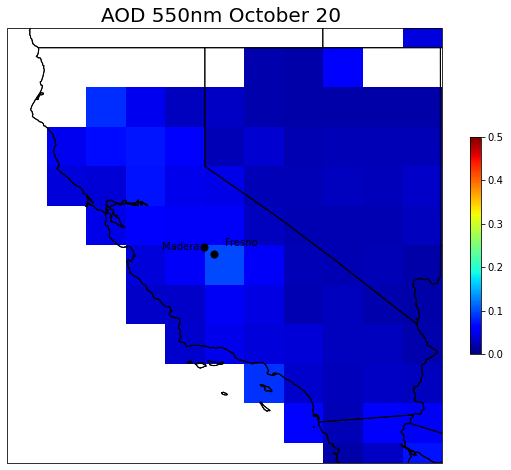

In [29]:
#oct20
fig=plt.figure(figsize=(10,8))

# This just sets up the plot region
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-125, -114, 31.5, 42.5], ccrs.PlateCarree())
cs=plt.pcolormesh(snppdataoct20['Longitude'],snppdataoct20['Latitude'],snppdataoct20['Aerosol_Optical_Thickness_550_Land_Mean'],cmap='jet',vmin=0,vmax=0.5)

ax.add_feature(cfeature.STATES) # Plot the state lines
ax.add_feature(cfeature.COASTLINE)
ax.scatter([-119.773210],[36.785380],marker='o',color='black',s=50,zorder=10,transform=ccrs.PlateCarree())
ax.text(-119.5,37,'Fresno')
ax.scatter([-120.034203],[36.953256],marker='o',color='black',s=50,zorder=10,transform=ccrs.PlateCarree())
ax.text(-120.134203,36.953256,'Madera', ha='right', va='center')


# Make a colorbar 
cax,kw = mplt.colorbar.make_axes(ax,location='right',pad=0.05,shrink=0.5)
cbar = fig.colorbar(cs,cax=cax,**kw)


# Put a title on the plot
ax.set_title('AOD 550nm October 20 ', fontsize=20)

Text(0.5, 1.0, 'AOD 550nm October 27 ')

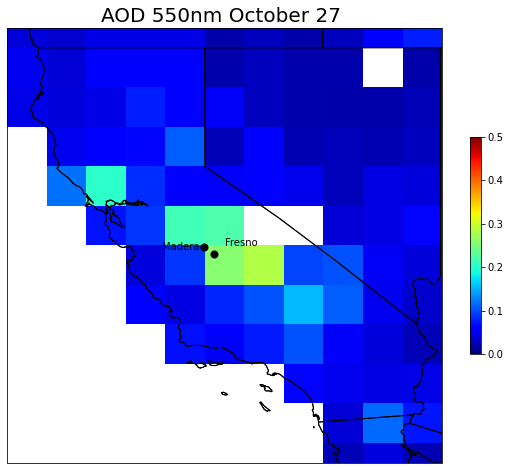

In [30]:
#oct27
fig=plt.figure(figsize=(10,8))

# This just sets up the plot region
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-125, -114, 31.5, 42.5], ccrs.PlateCarree())
cs=plt.pcolormesh(snppdataoct27['Longitude'],snppdataoct27['Latitude'],snppdataoct27['Aerosol_Optical_Thickness_550_Land_Mean'],cmap='jet',vmin=0,vmax=0.5)

ax.add_feature(cfeature.STATES) # Plot the state lines
ax.add_feature(cfeature.COASTLINE)
ax.scatter([-119.773210],[36.785380],marker='o',color='black',s=50,zorder=10,transform=ccrs.PlateCarree())
ax.text(-119.5,37,'Fresno')
ax.scatter([-120.034203],[36.953256],marker='o',color='black',s=50,zorder=10,transform=ccrs.PlateCarree())
ax.text(-120.134203,36.953256,'Madera', ha='right', va='center')


# Make a colorbar 
cax,kw = mplt.colorbar.make_axes(ax,location='right',pad=0.05,shrink=0.5)
cbar = fig.colorbar(cs,cax=cax,**kw)


# Put a title on the plot
ax.set_title('AOD 550nm October 27 ', fontsize=20)

Text(0.5, 1.0, 'AOD 550nm November 25 ')

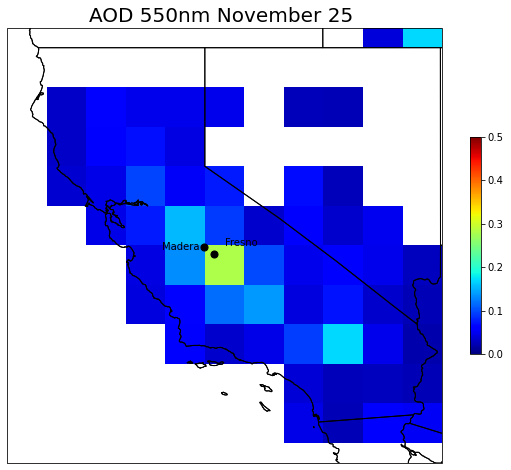

In [31]:
#nov22
fig=plt.figure(figsize=(10,8))

# This just sets up the plot region
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-125, -114, 31.5, 42.5], ccrs.PlateCarree())
cs=plt.pcolormesh(snppdatanov22['Longitude'],snppdatanov22['Latitude'],snppdatanov22['Aerosol_Optical_Thickness_550_Land_Mean'],cmap='jet',vmin=0,vmax=0.5)

ax.add_feature(cfeature.STATES) # Plot the state lines
ax.add_feature(cfeature.COASTLINE)
ax.scatter([-119.773210],[36.785380],marker='o',color='black',s=50,zorder=10,transform=ccrs.PlateCarree())
ax.text(-119.5,37,'Fresno')
ax.scatter([-120.034203],[36.953256],marker='o',color='black',s=50,zorder=10,transform=ccrs.PlateCarree())
ax.text(-120.134203,36.953256,'Madera', ha='right', va='center')


# Make a colorbar 
cax,kw = mplt.colorbar.make_axes(ax,location='right',pad=0.05,shrink=0.5)
cbar = fig.colorbar(cs,cax=cax,**kw)


# Put a title on the plot
ax.set_title('AOD 550nm November 25 ', fontsize=20)


Text(0.5, 1.0, 'Angstrom exponent October 20 ')

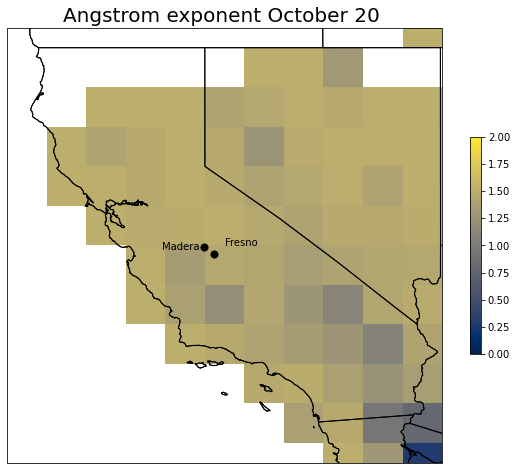

In [32]:
#oct20
fig=plt.figure(figsize=(10,8))

# This just sets up the plot region
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-125, -114, 31.5, 42.5], ccrs.PlateCarree())
cs=plt.pcolormesh(snppdataoct20['Longitude'],snppdataoct20['Latitude'],snppdataoct20['Angstrom_Exponent_Land_Mean'],cmap='cividis',vmin=0,vmax=2.0)

ax.add_feature(cfeature.STATES) # Plot the state lines
ax.add_feature(cfeature.COASTLINE)
ax.scatter([-119.773210],[36.785380],marker='o',color='black',s=50,zorder=10,transform=ccrs.PlateCarree())
ax.text(-119.5,37,'Fresno')
ax.scatter([-120.034203],[36.953256],marker='o',color='black',s=50,zorder=10,transform=ccrs.PlateCarree())
ax.text(-120.134203,36.953256,'Madera', ha='right', va='center')


# Make a colorbar 
cax,kw = mplt.colorbar.make_axes(ax,location='right',pad=0.05,shrink=0.5)
cbar = fig.colorbar(cs,cax=cax,**kw)


# Put a title on the plot
ax.set_title('Angstrom exponent October 20 ', fontsize=20)

Text(0.5, 1.0, 'Angstrom exponent October 27 ')

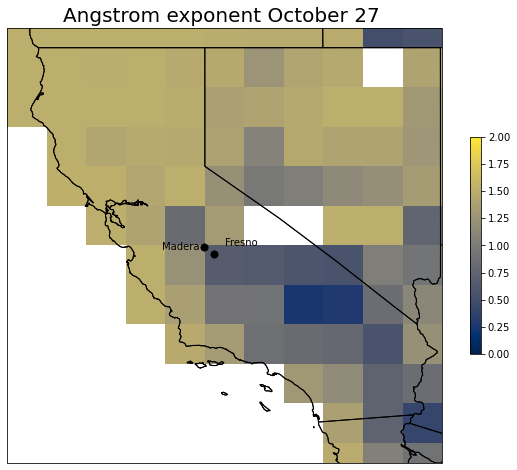

In [33]:
#oct27
fig=plt.figure(figsize=(10,8))

# This just sets up the plot region
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-125, -114, 31.5, 42.5], ccrs.PlateCarree())
cs=plt.pcolormesh(snppdataoct27['Longitude'],snppdataoct27['Latitude'],snppdataoct27['Angstrom_Exponent_Land_Mean'],cmap='cividis',vmin=0,vmax=2.0)

ax.add_feature(cfeature.STATES) # Plot the state lines
ax.add_feature(cfeature.COASTLINE)
ax.scatter([-119.773210],[36.785380],marker='o',color='black',s=50,zorder=10,transform=ccrs.PlateCarree())
ax.text(-119.5,37,'Fresno')
ax.scatter([-120.034203],[36.953256],marker='o',color='black',s=50,zorder=10,transform=ccrs.PlateCarree())
ax.text(-120.134203,36.953256,'Madera', ha='right', va='center')


# Make a colorbar 
cax,kw = mplt.colorbar.make_axes(ax,location='right',pad=0.05,shrink=0.5)
cbar = fig.colorbar(cs,cax=cax,**kw)


# Put a title on the plot
ax.set_title('Angstrom exponent October 27 ', fontsize=20)

Text(0.5, 1.0, 'Angstrom exponent November 25 ')

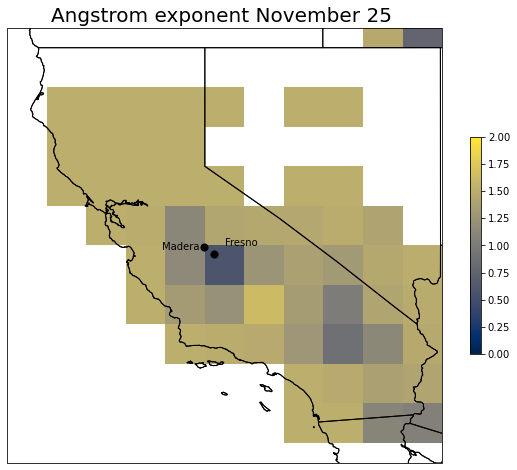

In [34]:
#oct20
fig=plt.figure(figsize=(10,8))

# This just sets up the plot region
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-125, -114, 31.5, 42.5], ccrs.PlateCarree())
cs=plt.pcolormesh(snppdatanov22['Longitude'],snppdatanov22['Latitude'],snppdatanov22['Angstrom_Exponent_Land_Mean'],cmap='cividis',vmin=0,vmax=2.0)

ax.add_feature(cfeature.STATES) # Plot the state lines
ax.add_feature(cfeature.COASTLINE)
ax.scatter([-119.773210],[36.785380],marker='o',color='black',s=50,zorder=10,transform=ccrs.PlateCarree())
ax.text(-119.5,37,'Fresno')
ax.scatter([-120.034203],[36.953256],marker='o',color='black',s=50,zorder=10,transform=ccrs.PlateCarree())
ax.text(-120.134203,36.953256,'Madera', ha='right', va='center')

# Make a colorbar 
cax,kw = mplt.colorbar.make_axes(ax,location='right',pad=0.05,shrink=0.5)
cbar = fig.colorbar(cs,cax=cax,**kw)


# Put a title on the plot
ax.set_title('Angstrom exponent November 25 ',fontsize=20)

In [1]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,15))
subplot_titles=['AOD 550nm', 'Angstrom exponent','AOD 550nm','Angstrom exponent','AOD 550nm','Angstrom exponent']
axs=axs.flatten()

# Loop over the figures
for i in range (0,6):
        axs[i].set_extent([-125, -114, 31.5, 42.5], ccrs.PlateCarree())
        if (i ==0):
            cs=axs[i].pcolormesh(snppdataoct20['Longitude'],snppdataoct20['Latitude'],snppdataoct20['Aerosol_Optical_Thickness_550_Land_Mean'],cmap='jet',vmin=0,vmax=0.5)
        elif (i ==1):
            cs=axs[i].pcolormesh(snppdataoct20['Longitude'],snppdataoct20['Latitude'],snppdataoct20['Angstrom_Exponent_Land_Mean'],cmap='cividis',vmin=0,vmax=2.0)    
        elif (i ==2):
            cs=axs[i].pcolormesh(snppdataoct27['Longitude'],snppdataoct27['Latitude'],snppdataoct27['Aerosol_Optical_Thickness_550_Land_Mean'],cmap='jet',vmin=0,vmax=0.5)    
        elif (i==3):
            cs=axs[i].pcolormesh(snppdataoct27['Longitude'],snppdataoct27['Latitude'],snppdataoct27['Angstrom_Exponent_Land_Mean'],cmap='cividis',vmin=0,vmax=2.0)
        elif (i==4):
             cs=axs[i].pcolormesh(snppdatanov22['Longitude'],snppdatanov22['Latitude'],snppdatanov22['Aerosol_Optical_Thickness_550_Land_Mean'],cmap='jet',vmin=0,vmax=0.5)
        elif (i==5):
             cs=axs[i].pcolormesh(snppdatanov22['Longitude'],snppdatanov22['Latitude'],snppdatanov22['Angstrom_Exponent_Land_Mean'],cmap='cividis',vmin=0,vmax=2.0)
        
        axs[i].set_title(subplot_titles[i])
        axs[i].add_feature(cfeature.STATES) # Plot the state lines
        axs[i].add_feature(cfeature.BORDERS)
        axs[i].add_feature(cfeature.COASTLINE)
        cax,kw = mplt.colorbar.make_axes(axs[i],location='right',pad=0.05,shrink=0.75)
        cbar = fig.colorbar(cs,cax=cax,**kw)
        axs[i].scatter([-119.773210],[36.785380],marker='o',color='blue',s=5,zorder=10,transform=ccrs.PlateCarree())
        axs[i].text(-119.5,37,'Fresno')
        axs[i].scatter([-120.034203],[36.953256],marker='o',color='red',s=5,zorder=10,transform=ccrs.PlateCarree())
        axs[i].text(-120.134203,36.953256,'Madera', ha='right', va='center')

        
#fig.suptitle('Angstrom Exponent and AOD 550nm',fontsize="x-large")    
                             

NameError: name 'plt' is not defined

In [11]:
#plotting all
fig, [0]axs = plt.subplots(nrows=3, ncols=2, figsize=(20,25))
# This just sets up the plot region
[0]ax = plt.[0]axes(projection=ccrs.PlateCarree())
[0]ax.set_extent([-125, -114, 31.5, 42.5], ccrs.PlateCarree())
cs1=plt.pcolormesh(snppdataoct20['Longitude'],snppdataoct20['Latitude'],snppdataoct20['Aerosol_Optical_Thickness_550_Land_Mean'],cmap='jet',vmin=0,vm[0]ax=0.5)

[0]ax.add_feature(cfeature.STATES) # Plot the state lines
[0]ax.add_feature(cfeature.COASTLINE)
[0]ax.scatter([-119.773210],[36.785380],marker='o',color='black',s=50,zorder=10,transform=ccrs.PlateCarree())
[0]ax.text(-119.5,37,'Fresno')
[0]ax.scatter([-120.034203],[36.953256],marker='o',color='black',s=50,zorder=10,transform=ccrs.PlateCarree())
[0]ax.text(-120.034203,36.953256,'Madera', ha='right', va='center')


# Make a colorbar 
c[0]ax,kw = mplt.colorbar.make_[0]axes([0]ax,location='right',pad=0.05,shrink=0.5)
cbar1 = fig.colorbar(cs,c[0]ax=c[0]ax,**kw)


# Put a title on the plot
[0]ax.set_title('AOD 550nm October 20 ')

SyntaxError: invalid syntax (3282272414.py, line 2)

In [26]:
#Finding exact menaf for AOD and angstrom exponent for fresno (And madera)

#Fresno, CA
#AOD
snppdatanov22['Aerosol_Optical_Thickness_550_Land_Mean'][126,60]
october20_aod_mean=0.099
october27_aod_mean=0.256
november25_aod_mean=0.281

#Angstrom Exponent
snppdataoct27['Angstrom_Exponent_Land_Mean'][126,60]
october20_ang_mean=1.45
october27_ang_mean=0.664
november25_ang_mean=0.585

#Madera####
snppdatanov22['Aerosol_Optical_Thickness_550_Land_Mean'][126,60]
october20_aod_mean=0.099
october27_aod_mean=0.256
november25_aod_mean=0.281

#Angstrom Exponent
snppdataoct27['Angstrom_Exponent_Land_Mean'][126,60]
october20_ang_mean=1.45
october27_ang_mean=0.664
november25_ang_mean=0.585


In [28]:
snppdataoct20['Angstrom_Exponent_Land_Mean'][126,60]

<xarray.DataArray 'Angstrom_Exponent_Land_Mean' ()>
array(1.449498, dtype=float32)
Coordinates:
    Latitude      float32 36.5
    Latitude_1D   float32 36.5
    Longitude     float32 -119.5
    Longitude_1D  float32 -119.5
Attributes:
    long_name:    angstrom exponent over land, from 412 and 490 nm (arid) or ...
    units:        1
    valid_range:  [-0.5  2.5]